In [52]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
samp = np.loadtxt('170170.txt', usecols=4)
MIN=samp.min();MAX=samp.max();MEAN=samp.mean();STD=samp.std();VAR=samp.var()
MIN,MAX,MEAN,STD,VAR

(1527.85, 6831.3, 2471.2782, 1061.9694483659878, 1127779.1092627603)

In [63]:
param = stats.expon.fit(samp) # distribution fitting

x = np.linspace(MIN,MAX,1000) # fitted distribution
pdf_fitted = stats.expon.pdf(x, *param)

In [64]:
param

(1527.85, 943.4282000000003)

Power_divergenceResult(statistic=37.52408955193665, pvalue=3.731342630009403e-06)
37.88602250701683


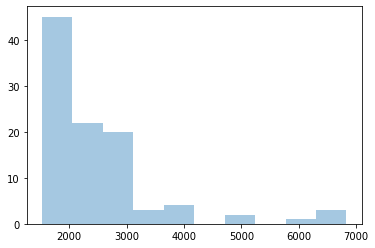

In [65]:
# chi-square
counts, edges, plot = plt.hist(samp,bins=10,alpha=0.4)

summ = 0
for i in range(0,10):
    upper_cdf = stats.expon.cdf(edges[i+1], *param)
    lower_cdf = stats.expon.cdf(edges[i], *param)
    summ += (counts[i]**2/(100*(upper_cdf-lower_cdf)))
chi_statistic = summ - 100

exp_counts = np.array([])
for i in range(0,10):
    upper_cdf = stats.expon.cdf(edges[i+1], *param)
    lower_cdf = stats.expon.cdf(edges[i], *param)
    exp_counts = np.append(exp_counts, 100 * (upper_cdf - lower_cdf))
print(stats.chisquare(counts,exp_counts,ddof=2))
print(chi_statistic)

In [66]:
stats.kstest(samp,'expon',args = (param[0],param[1]))

KstestResult(statistic=0.06713308751185543, pvalue=0.777334978045785)

In [68]:
stats.anderson(samp, 'expon')

AndersonResult(statistic=21.534591721120123, critical_values=array([0.917, 1.072, 1.333, 1.596, 1.945]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

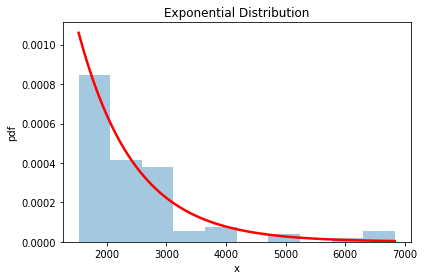

In [70]:
fig,axes = plt.subplots()

axes.plot(x,pdf_fitted,'r',lw=2.5)
axes.set_xlabel('x')
axes.set_ylabel('pdf')
axes.set_title('Exponential Distribution')
fig.tight_layout()

plt.hist(samp,alpha=0.4,density=True)
fig.savefig("s5_expon.png",dpi=400)

In [69]:
k = 1
logLik = np.sum(stats.expon.logpdf(samp, *param)) 
aic = 2*k - 2*(logLik)
aic

1571.9040524567679